Обработка естественного языка (Natural Language Processing, NLP) включает задачи, связанные с текстами на естественном языке. Это задачи понимания языка и генерации текстов, а некоторые из них охватывают оба аспекта.

- Векторные представления слов:
  - BOW
  - Tf-idf
  - LSA  
- Эмбеддинги слов:
  - Контекстные эмбеддинги
  - Word2Vec
  - GloVe, FastText

***

### One-hot Encoding
Создадим словарь фиксированного размера с примерами:

| Слово  | Векторное представление            |
|--------|----------------------------------|
| cat    | [1, 0, 0, …, 0]                  |
| dog    | [0, 1, 0, …, 0]                  |
| …      | …                                |
| mother | [0, 0, 0, …, 1, …, 0] (i-я координата) |

Например, если размер словаря равен 50 000, каждая позиция соответствует одному слову.

Недостатки one-hot encoding:

- Векторы слов не отражают смысл слова, нельзя измерить «похожесть» двух слов по значению.
- Векторы разрежены и требуют большого объема памяти.
- Размер словаря ограничен, слова вне словаря не обрабатываются.
- При изменении размера словаря все векторы нужно пересчитывать заново.

***

### Bag Of Words
Словарь:

| Индекс | Слово      |
|---------|------------|
| 1       | a          |
| 2       | and        |
| 14      | are        |
| 145     | cat        |
| 257     | dog        |
| 678     | is         |
| 1537    | sleeping   |


| Предложение                  | Вектор BoW                                              |
|-----------------------------|---------------------------------------------------------|
| 1. a cat and a dog are sleeping | [2, 1, 0, …, 1, 0, …, 0, 1, 0, …, 1, 0, …, 0, …, 1, …, 0] |
| 2. a dog is walking             | [1, 0, 0, …, 0, 0, …, 0, 0, 0, …, 1, 0, …, 1, …, 0, …, 0] |
|indexes|$\space$ 1 $\space$ 2 $\quad \space$ 14 $\qquad \quad$ 145 $\quad$ 257 $\quad$ 678 $\space$ 1537|

Наследуются все недостатки one-hot encoding:
- Векторы предложений не очень хорошо отражают
смысл предложения. Порядок слов не
учитывается;
- Векторы довольно разрежены, требуют много
лишней памяти;
- Фиксированный размер словаря.
Слова, не попавшие в словарь, не могут быть
обработаны.
- При изменении размера словаря нужно
пересчитывать векторы заново.

Еще один недостаток BoW — различные слова
могут иметь разную важность для текста.

###TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) — статистическая мера важности слова в документе с учётом частоты его использования в данном документе и обратной частоты встречаемости этого слова во всех документах корпуса.


- Частота термина (TF):

  $$ \mathrm{TF}(t, d) = \frac{\text{число вхождений } t \text{ в } d}{\text{общее число слов в } d} $$

- Обратная частота документа (IDF):

  $$ \mathrm{IDF}(t) = \log \left( \frac{N}{n_t} \right) $$

  где $N$ — общее число документов, $n_t$ — количество документов, содержащих термин $t$.

- Формула TF-IDF:

  $$ \mathrm{TF	\text{-}IDF}(t,d) = \mathrm{TF}(t,d) \times \mathrm{IDF}(t) $$

Для слова «a» в двух предложениях:

1. a cat and a dog are sleeping  
2. a dog is walking

Общее число документов $N = 2$.

**Шаг 1**: Рассчитаем TF (частоту термина)  
- В предложении 1: слово «a» встречается 2 раза из 7 слов  
  $$
  \mathrm{TF}(a, d_1) = \frac{2}{7} \approx 0.286
  $$  
- В предложении 2: слово «a» встречается 1 раз из 4 слов  
  $$
  \mathrm{TF}(a, d_2) = \frac{1}{4} = 0.25
  $$

**Шаг 2**: Рассчитаем IDF (обратную частоту по документам)  
Слово «a» есть в обоих документах, значит количество документов с этим словом $n_a = 2$.  
$$
\mathrm{IDF}(a) = \log \frac{N}{n_a} = \log \frac{2}{2} = \log 1 = 0
$$

**Шаг 3**: Рассчитаем TF-IDF  
$$
\mathrm{TF-IDF}(a, d_1) = \mathrm{TF}(a, d_1) \times \mathrm{IDF}(a) = 0.286 \times 0 = 0
$$  
$$
\mathrm{TF-IDF}(a, d_2) = \mathrm{TF}(a, d_2) \times \mathrm{IDF}(a) = 0.25 \times 0 = 0
$$

Для слова «walking»:
  $$
  \mathrm{TF}(walking, d_1) = 0
  $$   
  $$
  \mathrm{TF}(walking, d_2) = \frac{1}{4} = 0.25
  $$
$$
\mathrm{IDF}(walking) = \log \frac{N}{n_{walking}} = \log \frac{2}{1} = \log 2 \approx 0.693
$$
$$
\mathrm{TF \text{-} IDF}(walking, d_1) = 0 \times 0.693 = 0
$$  
$$
\mathrm{TF \text{-} IDF}(walking, d_2) = 0.25 \times 0.693 \approx 0.173
$$

Плюсы:
- Векторы имеют больший смысл, чем при BoW;
- Возможность решать такие задачи, как ранжирование
документов и выделение ключевых слов;

Недостатки:
- Векторы довольно разрежены;
- Фиксированный размер словаря.
- При изменении коллекции документов векторы
нужно пересчитывать.


### LSA (Латентный семантический анализ)

Идея: использовать сингулярное разложение матрицы документы-слова. Заметим что при "срезе" диагональной матрицы точность снижается, но смысл сохраняется.

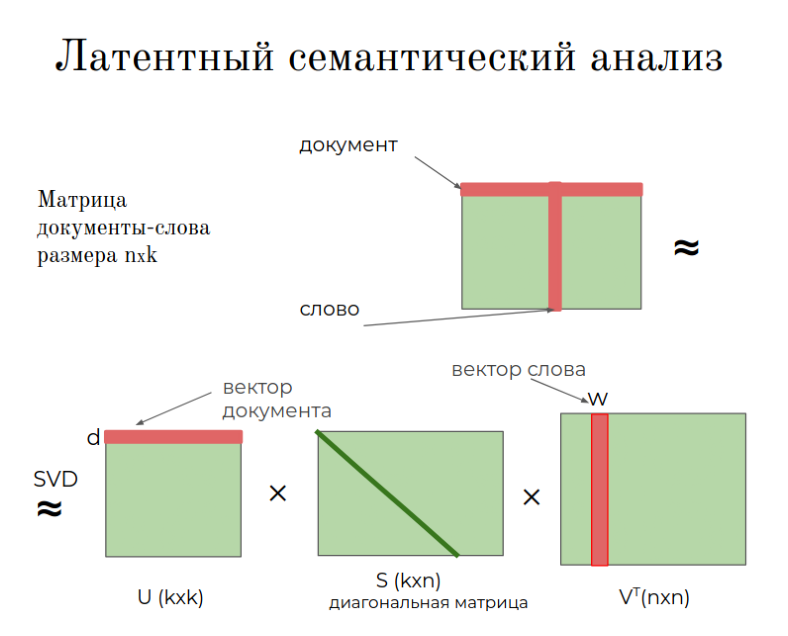

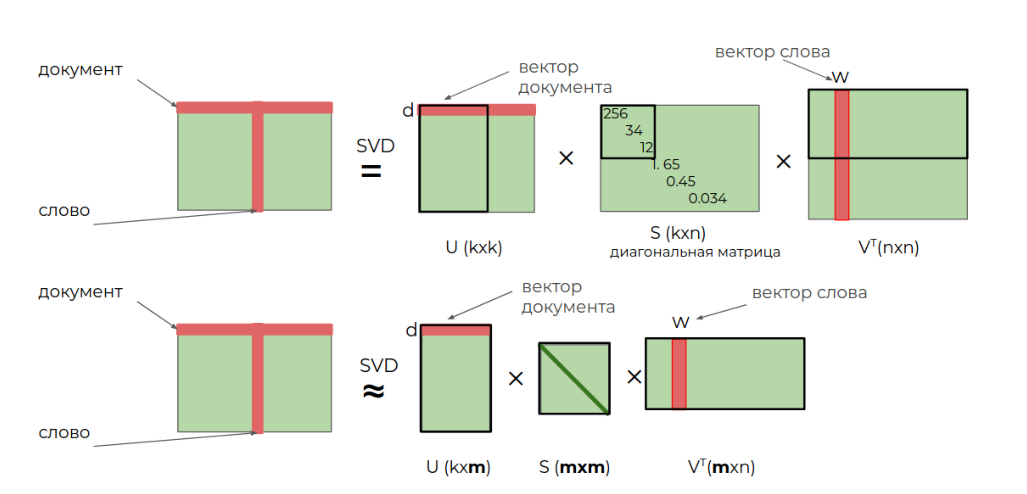

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('picture_1.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('picture_2.png')
plt.figure(figsize=(13, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


Плюсы:
- Векторы имеют смысл;
- Возможность уменьшать размер эмбеддингов без
существенной потери качества.  

Недостатки:
- Большая вычислительная сложность при большом
количестве документов;
- Фиксированный размер словаря;
- При изменении коллекции документов векторы
нужно пересчитывать;
- Вероятностная модель метода не соответствует
реальности.

### Контекстные эмбеддинги

- Контекстные эмбеддинги строятся с учётом контекста, в котором встречается слово.  
- Смысл слова определяется окружающими словами, а не только самим словом.  
- Пример: рассмотрим предложения с пропусками и кандидаты на их место:  
  1. Маша ездит на ______  
  2. Колесо ______ было проколото  
  3. У ______ красивая белая рама  
- Разные кандидаты (велосипед, мотоцикл, машина, лошадь) подходят или не подходят в зависимости от контекста.

***

### Идея контекстных векторов слов

- Контекстные векторы слов — это строки матрицы, где каждая строка соответствует слову, а значение зависит от контекста.  
- Таким образом, векторы отражают смысл слова в конкретном контексте.  
- Векторы можно сравнивать по косинусному расстоянию или среднеквадратичной ошибке (MSE) для оценки смысловой близости.

***

### Преимущества и недостатки

**Плюсы:**
- Векторы начинают отражать смысл слов, а не только их частотность.  
- Можно сравнивать слова на схожесть.

**Минусы:**
- Векторы всё ещё довольно разрежены и требуют много памяти.  
- Размер словаря ограничен, слова вне словаря не обрабатываются.  
- При изменении словаря нужно пересчитывать векторы заново.  
- Эмбеддинги для редких слов менее информативны.


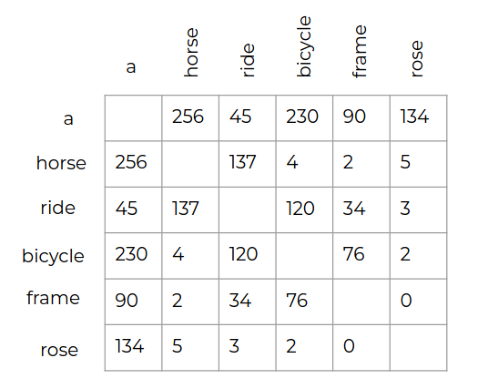

In [2]:
img = mpimg.imread('picture_3.png')
plt.imshow(img)
plt.axis('off')
plt.show()

- Для визуализации и снижения размерности применяют методы PCA, t-SNE.  
- Используют сингулярное разложение (SVD), чтобы представить слова и контексты в более компактном пространстве.  
- Полученные векторы отражают семантические сходства между словами.


### Word2Vec

Мы будем учить нейросеть по слову предсказывать
слова, которые могут находиться в контексте
(стоять вокруг этого слова).

Наш датасет — набор текстов. Мы будем идти по датасету
скользящим окном размера 5, и в каждом положении окна по
центральному слову учить нейросеть предсказывать слова,
находящиеся в текущем окне.

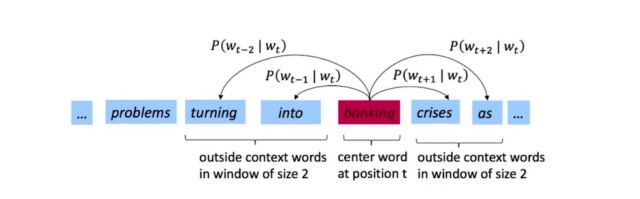

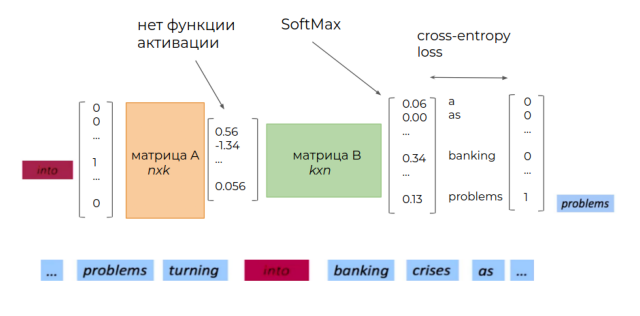

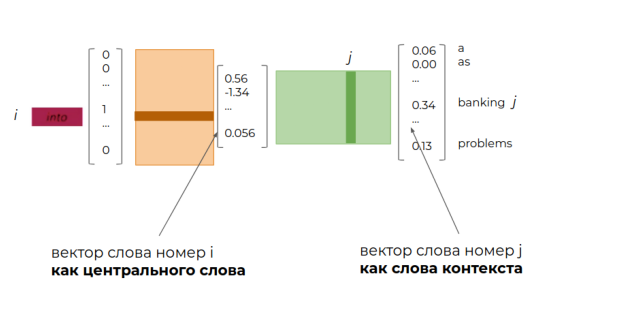

In [3]:
img = mpimg.imread('picture_4.png')
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()
img = mpimg.imread('picture_5.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()
img = mpimg.imread('picture_6.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


На векторах word2vec можно проводить
векторную арифметику:
$$
v(king) - v(man) + v(woman) ≈ v(queen)
$$

Преимущества:
- Векторы отражают смысл слов;
- Размерность векторов не зависит от размера словаря;
- При добавлении документов векторы можно дообучить.  

Недостатки:
- Фиксированный размер словаря. При изменении размера
словаря документов векторы нужно пересчитывать;
- Для редких слов эмбеддинги получаются
неоптимальными;
- Слова, имеющие один корень, обрабатываются
нейросетью по-разному.
eat, eater, eating

**Skip-Gram** — предсказание слов контекста по
центральному слову

**CBOW** — предсказание центрального слова
по словам контекста

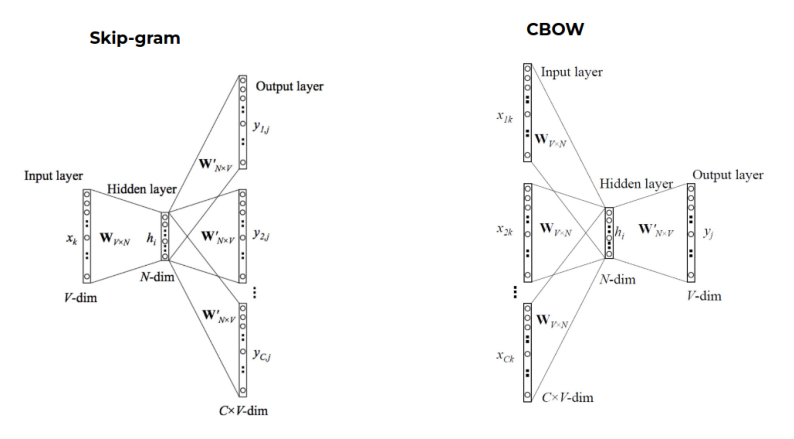

In [4]:
img = mpimg.imread('picture_7.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


### FastText
Идея — будем строить векторы для частей слов, а не для
целых слов.
- Делим слова на n-граммы по буквам:
apple = <ap, ppl, ple, le>
- Учим векторы для n-грамм;
- Вектор слова получаем как сумму векторов его n-
грамм.  

Плюсы:
- Можно получить более адекватные эмбеддинги для
редких и неизвестных слов;  

Недостатки:
- n-грамм может быть очень много. Требуется больше
вычислительных ресурсов.

### GloVe (Global Vectors)
GloVe использует статистическую информацию о частоте
встречаемости слов и фраз в тексте, чтобы улучшить
обучение эмбеддингов редких слов.
Подробнее можно почитать [тут](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010).

### Эмбеддинги в общем смысле

Эмбеддинг — векторное представление объекта,
которое отражает информацию об объекте.
Выходы слоев моделей, обученных под какую-
либо задачу, тоже можно считать эмбеддингами.

Иными словами, при обучении нейронной сети выход последнего слоя - тоже эмбеддинг.


## Обучение эмбеддингов на примере задачи ранжирования

* $X$ - множество объектов
* $X^l = \{x_1, x_2, ..., x_l\}$ - обучающая выборка
<br>На обучающей выборке задан порядок между некоторыми элементами, то есть нам известно, что некий объект выборки более релевантный для нас, чем другой:
* $i \prec j$ - порядок пары индексов объектов на выборке $X^l$ c индексами $i$ и $j$
### Задача:
построить ранжирующую функцию $a$ : $X \rightarrow R$ такую, что
$$i \prec j \Rightarrow a(x_i) < a(x_j)$$

### Оценка близости текстов

Представим, что мы используем идеальные векторные представления слов. Тогда косинусное расстояние между дублирующими предложениями должно быть меньше, чем между случайно взятыми предложениями.

Сгенерируем для каждого из $N$ вопросов $R$ случайных примеров и примешаем к ним также настоящие дубликаты. Для каждого вопроса будем ранжировать с помощью нашей модели $R + 1$ примеров и смотреть на позицию дубликата. Мы хотим, чтобы дубликат был первым в ранжированном списке.

#### Hits@K
Первой простой метрикой будет количество корректных попаданий для какого-то $K$:
$$ \text{Hits@K} = \frac{1}{N}\sum_{i=1}^N \, [rank\_q_i^{'} \le K],$$
$\begin{equation}
[x < 0 ] \equiv
 \begin{cases}
   1, &x < 0\\
   0, &x \geq 0
 \end{cases}
\end{equation}$ - индикаторная функция
* $q_i$ - $i$-ый вопрос
* $q_i^{'}$ - его дубликат
* $rank\_q_i^{'}$ - позиция дубликата в ранжированном списке ближайших предложений для вопроса $q_i$.

Hits@K  измеряет долю вопросов, для которых правильный ответ попал в топ-K позиций среди отранжированных кандидатов.

#### DCG@K
Второй метрикой будет упрощенная DCG метрика, учитывающая порядок элементов в списке путем домножения релевантности элемента на вес равный обратному логарифму номера позиции::
$$ \text{DCG@K} = \frac{1}{N} \sum_{i=1}^N\frac{1}{\log_2(1+rank\_q_i^{'})}\cdot[rank\_q_i^{'} \le K],$$
С такой метрикой модель штрафуется за большой ранк корректного ответа.

DCG@K  измеряет качество ранжирования, учитывая не только факт наличия правильного ответа в топ-K, но и ***его точную позицию***.

Мы будем ранжировать вопросы [StackOverflow](https://stackoverflow.com) на основе семантического векторного представления

In [5]:
import numpy as np
import re
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
import math
from sklearn.metrics.pairwise import cosine_similarity
from copy import deepcopy

In [6]:
# @title
def hits_count(dup_ranks, k):
    """
        dup_ranks: list индексов дубликатов
        k: пороговое значение для ранга
        result: вернуть Hits@k
    """
    # Подсчитываем количество дубликатов, чей ранг <= k
    hits_velue = len(list(filter(lambda x: x <= k, dup_ranks)))
    hits_velue /= len(dup_ranks)
    return hits_velue

def dcg_score(dup_ranks, k):
    """
        dup_ranks: list индексов дубликатов
        k: пороговое значение для ранга
        result: вернуть DCG@k
    """
    # Вычисляем сумму для всех релевантных дубликатов
    dcg_value = sum(map(lambda x: 1 / np.log2(1 + x) if x <= k else 0, dup_ranks))
    # Делим на общее количество вопросов
    dcg_value /= len(dup_ranks)
    return dcg_value

def question_to_vec(question, embeddings, tokenizer, dim=200):
    """
        question: строка
        embeddings: наше векторное представление
        dim: размер любого вектора в нашем представлении

        return: векторное представление для вопроса
    """
    tokenized_question = tokenizer.tokenize(question)
    question_embedding = np.zeros([dim], dtype='float32')
    word_count = 0
    for word in tokenized_question:
        if word in embeddings:
            question_embedding += embeddings[word]
            word_count += 1
    if word_count != 0:
        question_embedding /= word_count
    return question_embedding

def rank_candidates(question, candidates, embeddings, tokenizer, dim=200):
    """
        question: строка
        candidates: массив строк(кандидатов) [a, b, c]
        result: пары (начальная позиция, кандидат) [(2, c), (0, a), (1, b)]
    """
    result = []
    question_embeddeing = question_to_vec(question, embeddings, tokenizer, dim).reshape(1, -1)
    for candidate_id, candidate in enumerate(candidates):
        candidate_embedding = question_to_vec(candidate, embeddings, tokenizer, dim).reshape(1, -1)
        cos_sim = cosine_similarity(question_embeddeing, candidate_embedding)
        result.append((candidate_id, candidate, cos_sim))
    result.sort(key=lambda x: x[2], reverse=True)
    result = list(map(lambda x: (x[0], x[1]), result))
    return result

In [7]:
def read_corpus(filename):
    data = []
    with open(filename, encoding='utf-8') as file:
        for line in file:
            data.append(line.strip().split('\t'))
    return data

validation_data = read_corpus('./data/validation.tsv')
train_data = read_corpus('./data/train.tsv')[:20000] # в рамках доклада срежем часть датасета

In [52]:
for line in train_data[:10]:
  print(line)

['converting string to list', 'Convert Google results object (pure js) to Python object']
['Which HTML 5 Canvas Javascript to use for making an interactive drawing tool?', 'Event handling for geometries in Three.js?']
['Sending array via Ajax fails', 'Getting all list items of an unordered list in PHP']
['How to insert CookieCollection to CookieContainer?', 'C# create cookie from string and send it']
['Updating one element of a bound Observable collection', 'WPF- How to update the changes in list item of a list']
['MongoDB error on find()', 'Retrieve only the queried element in an object array in MongoDB collection']
['select2 not displaying search results', 'How to use jQuery AJAX for an outside domain?']
['Using Reduce to merge multiple data frames with passing arguments and without defining function outside the Reduce (syntax)', 'R - merge a list of data frames into one data frame with missing values by row']
['Adding Prototype to JavaScript Object Literal', 'How does JavaScript .pr

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import spacy
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

def preproces(text):
    spacy_results = nlp(text)
    spacy_results = [token.lemma_ for token in spacy_results if not token.is_punct and token.lemma_ not in stopWords]
    return spacy_results

In [10]:
from tqdm.auto import tqdm
corpus = []
for line in tqdm(train_data):
    question, *examples = line
    for example in examples:
        corpus_item = ' '.join([question, example])
        preproces(corpus_item)
        corpus.append(corpus_item)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [11]:
!pip install gensim

In [12]:
from gensim.models import Word2Vec
embeddings_trained_with_preproces = Word2Vec(
    sentences=corpus,        # Корпус токенизированных текстов
    vector_size=200,         # Размерность векторов
    window=5,                # Размер окна контекста
    min_count=5,             # Минимальная частота слов
).wv

In [13]:
class MyTokenizer:
    def __init__(self):
        pass
    def tokenize(self, text):
        return preproces(text)
preproces_tokenizer = MyTokenizer()


In [14]:
wv_ranking = []
max_validation_examples = 1000
for i, line in enumerate(tqdm(validation_data)):
    if i == max_validation_examples:
        break
    q, *ex = line
    ranks = rank_candidates(q, ex, embeddings_trained_with_preproces, preproces_tokenizer)
    wv_ranking.append([r[0] for r in ranks].index(0) + 1)

for k in tqdm([1, 5, 10, 100, 500, 1000]):
    print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.879 | Hits@   1: 0.879
DCG@   5: 0.881 | Hits@   5: 0.883
DCG@  10: 0.881 | Hits@  10: 0.883
DCG@ 100: 0.890 | Hits@ 100: 0.935
DCG@ 500: 0.896 | Hits@ 500: 0.979
DCG@1000: 0.898 | Hits@1000: 1.000


## RNN, GRU и LSTM

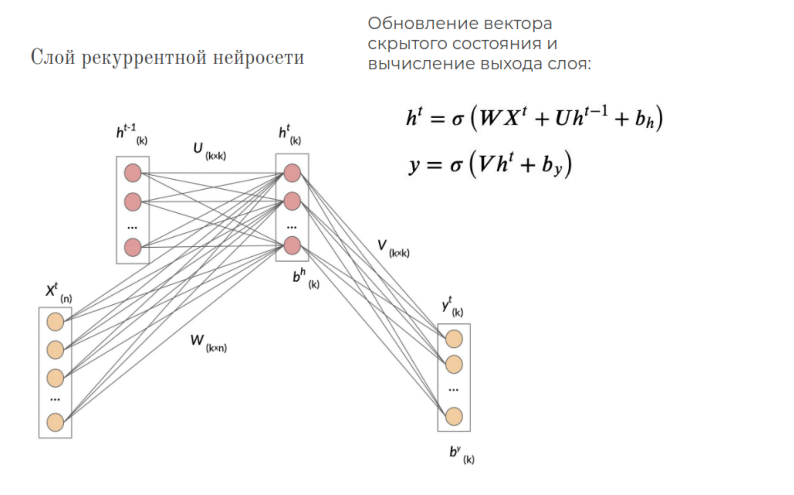

In [15]:
img = mpimg.imread('picture_8.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

Отдельной темой доклада могло бы стать обучение RNN, и почему функцией активации должен быть Tanh, если коротко, то для длинных временных последовательность при вычислении градента получаем премножение большого количества производных функции активации, что ведеть либо к затуханию, либо к взрыву градиентов.

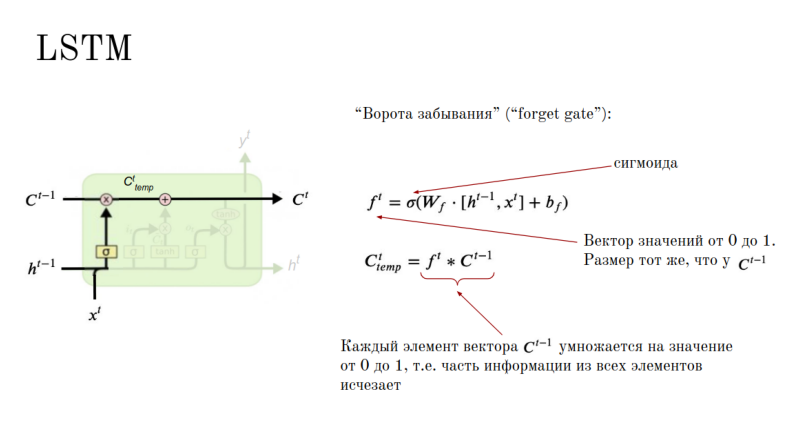

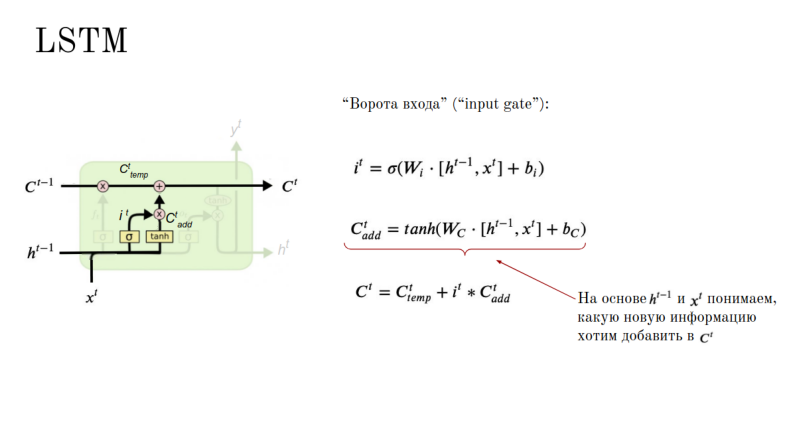

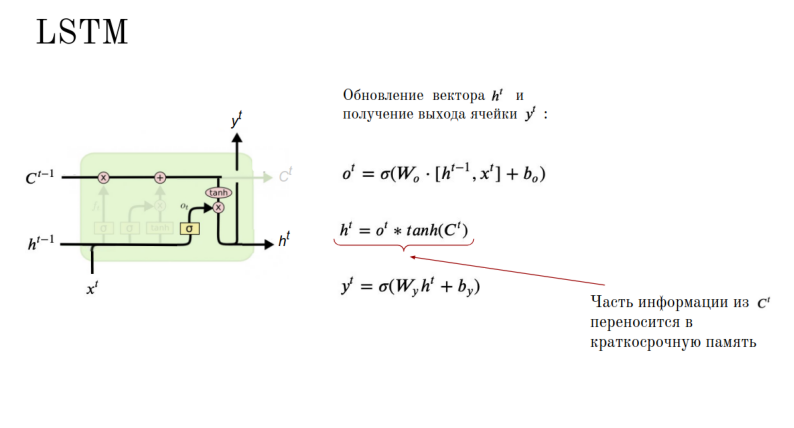

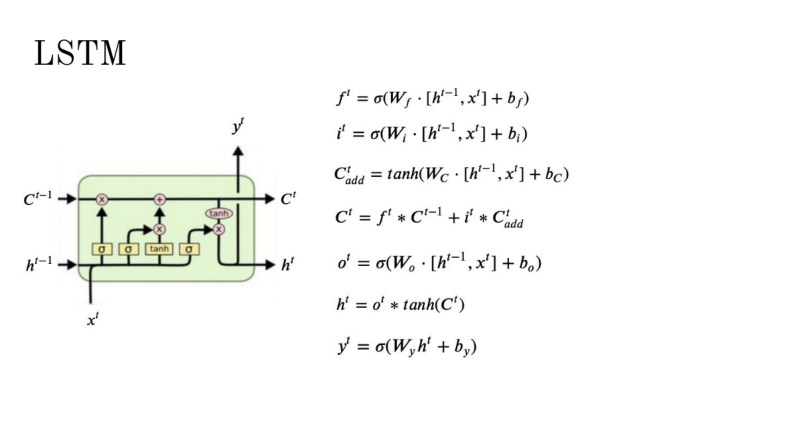

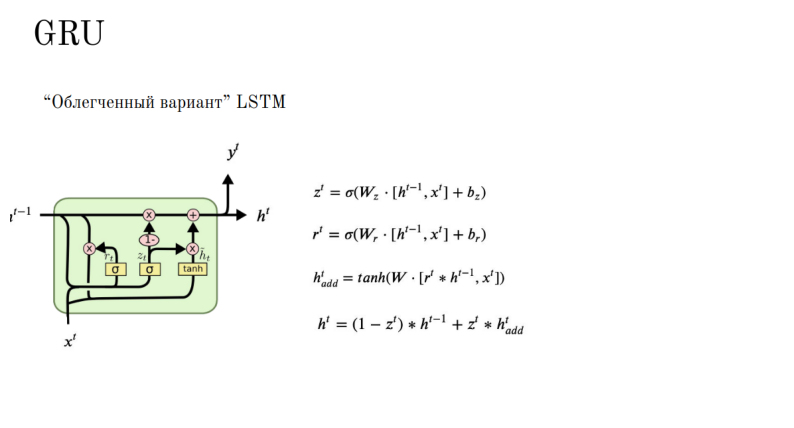

In [16]:
for i in range(9, 14):
  img = mpimg.imread(f'picture_{i}.png')
  plt.figure(figsize=(10, 8))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import datasets

import numpy as np
import matplotlib.pyplot as plt

from datasets import load_dataset
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import nltk

from collections import Counter
from typing import List
import string

import seaborn
seaborn.set(palette='summer')

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Датасет: AG News от Hugging Face


label — целевой класс новости, целочисленное значение от 0 до 3, где:

    0: World (Мир)

    1: Sports (Спорт)

    2: Business (Бизнес)

    3: Sci/Tech (Наука и технологии)

text — текст новости в виде строки, который содержит заголовок и краткое описание новости.


In [19]:
# Загрузим датасет
dataset = datasets.load_dataset('ag_news')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [59]:
for i in range(0, len(dataset['train']['label']), 15000):
  print(dataset['train']['label'][i], ':', dataset['train']['text'][i])
  print()

2 : Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

0 : AU Says Sudan Launches New Attacks on Darfuris (Reuters) Reuters - Nigerian President and African Union (AU)\chairman Olusegun Obasanjo said Monday AU cease-fire monitors\had confirmed Darfur rebel reports that the Sudan government\launched fresh attacks on civilians last week.

0 : Kerry Accuses Bush of Hiding the Truth About Iraq Senator Kerry leveled his charges in a speech prepared for delivery later today before the National Guard Association in Las Vegas.

3 : Government IT Tom Jarrett, the new president of the National Association of State Chief Information Officers will discuss challenges facing state government information technology officials. Filter columnist Cynthia L. Webb will moderate the discussion.

3 : BYTE OF THE APPLE Apple lost one war to Microsoft by not licensing its Mac operating system. It may repeat the error

In [21]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
words = Counter()

for example in tqdm(dataset['train']['text']):
    # Приводим к нижнему регистру и убираем пунктуацию
    processed_text = example.lower().translate(
        str.maketrans('', '', string.punctuation))

    tokenize_text = word_tokenize(processed_text)

    for word in tokenize_text:
        words[word] += 1


vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
counter_threshold = 25

for char, cnt in words.items():
    if cnt > counter_threshold:
        vocab.add(char)

print(f'Размер словаря: {len(vocab)}')

word2ind = {char: i for i, char in enumerate(vocab)}
ind2word = {i: char for char, i in word2ind.items()}

  0%|          | 0/120000 [00:00<?, ?it/s]

Размер словаря: 11842


In [23]:
class WordDataset:
    def __init__(self, sentences):
        self.data = sentences
        self.unk_id = word2ind['<unk>']
        self.bos_id = word2ind['<bos>']
        self.eos_id = word2ind['<eos>']
        self.pad_id = word2ind['<pad>']

    def __getitem__(self, idx: int) -> List[int]:
        processed_text = self.data[idx]['text'].lower().translate(
            str.maketrans('', '', string.punctuation))
        tokenized_sentence = [self.bos_id]
        tokenized_sentence += [
            word2ind.get(word, self.unk_id) for word in word_tokenize(processed_text)
            ]
        tokenized_sentence += [self.eos_id]

        train_sample = {
            "text": tokenized_sentence,
            "label": self.data[idx]['label']
        }

        return train_sample

    def __len__(self) -> int:
        return len(self.data)


def collate_fn_with_padding(
    input_batch: List[List[int]], pad_id=word2ind['<pad>'], max_len=256) -> torch.Tensor:
    seq_lens = [len(x['text']) for x in input_batch]
    max_seq_len = min(max(seq_lens), max_len)

    new_batch = []
    for sequence in input_batch:
        sequence['text'] = sequence['text'][:max_seq_len]
        for _ in range(max_seq_len - len(sequence['text'])):
            sequence['text'].append(pad_id)

        new_batch.append(sequence['text'])

    sequences = torch.LongTensor(new_batch).to(device)
    labels = torch.LongTensor([x['label'] for x in input_batch]).to(device)

    new_batch = {
        'input_ids': sequences,
        'label': labels
    }

    return new_batch

In [24]:
train_dataset = WordDataset(dataset['train'])

np.random.seed(42)
idx = np.random.choice(np.arange(len(dataset['test'])), 5000)
eval_dataset = WordDataset(dataset['test'].select(idx))

batch_size = 32
train_dataloader = DataLoader(
    train_dataset, shuffle=True, collate_fn=collate_fn_with_padding, batch_size=batch_size)

eval_dataloader = DataLoader(
    eval_dataset, shuffle=False, collate_fn=collate_fn_with_padding, batch_size=batch_size)

In [25]:
def evaluate(model, eval_dataloader) -> float:
    """
    Calculate accuracy on validation dataloader.
    """

    predictions = []
    target = []
    with torch.no_grad():
        for batch in eval_dataloader:
            logits = model(batch['input_ids'])
            predictions.append(logits.argmax(dim=1))
            target.append(batch['label'])

    predictions = torch.cat(predictions)
    target = torch.cat(target)
    accuracy = (predictions == target).float().mean().item()

    return accuracy

In [46]:
class RNNClassifier(nn.Module):
    def __init__(
        self, hidden_dim: int, vocab_size: int, num_classes: int = 4,
        aggregation_type: str = 'max'
        ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.rnn = nn.RNN(hidden_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.projection = nn.Linear(hidden_dim, num_classes)

        self.non_lin = nn.Tanh()
        self.dropout = nn.Dropout(p=0.1)

        self.aggregation_type = aggregation_type

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  # [batch_size, seq_len, hidden_dim]
        output, _ = self.rnn(embeddings)  # [batch_size, seq_len, hidden_dim]
        output = output.mean(dim=1) #[batch_size, hidden_dim]
        output = self.dropout(self.linear(self.non_lin(output)))  # [batch_size, hidden_dim]
        prediction = self.projection(self.non_lin(output))  # [batch_size, num_classes]
        return prediction

In [47]:
class GRUClassifier(nn.Module):
    def __init__(
        self, hidden_dim: int, vocab_size: int, num_classes: int = 4,
        aggregation_type: str = 'max'
        ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.gru = nn.GRU(hidden_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.projection = nn.Linear(hidden_dim, num_classes)

        self.non_lin = nn.Tanh()
        self.dropout = nn.Dropout(p=0.1)

        self.aggregation_type = aggregation_type

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  # [batch_size, seq_len, hidden_dim]
        output, _ = self.gru(embeddings)  # [batch_size, seq_len, hidden_dim]
        output = output.mean(dim=1) #[batch_size, hidden_dim]
        output = self.dropout(self.linear(self.non_lin(output)))  # [batch_size, hidden_dim]
        prediction = self.projection(self.non_lin(output))  # [batch_size, num_classes]
        return prediction

In [48]:
class LSTMClassifier(nn.Module):
    def __init__(
        self, hidden_dim: int, vocab_size: int, num_classes: int = 4
        ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.gru = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.projection = nn.Linear(hidden_dim, num_classes)

        self.non_lin = nn.Tanh()
        self.dropout = nn.Dropout(p=0.1)

        self.aggregation_type = aggregation_type

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  # [batch_size, seq_len, hidden_dim]
        output, _ = self.gru(embeddings)  # [batch_size, seq_len, hidden_dim]
        output = output.mean(dim=1) #[batch_size, hidden_dim]

        output = self.dropout(self.linear(self.non_lin(output)))  # [batch_size, hidden_dim]
        prediction = self.projection(self.non_lin(output))  # [batch_size, num_classes]
        return prediction

In [49]:
num_epoch = 3
eval_steps = len(train_dataloader) // 2

model_acc = {}
losses_type = {}
acc_type = {}

aggregation_type = 'mean'

losses = []

models = [RNNClassifier(hidden_dim=256, vocab_size=len(vocab)),
          GRUClassifier(hidden_dim=256, vocab_size=len(vocab)),
          LSTMClassifier(hidden_dim=256, vocab_size=len(vocab))]
for model in models:
    print(f'Trainng model {model.__class__.__name__}')
    model = model.to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=word2ind['<pad>'])
    optimizer = torch.optim.Adam(model.parameters())
    acc = []

    for epoch in range(num_epoch):
        epoch_losses = []
        model.train()
        for i, batch in enumerate(tqdm(train_dataloader, desc=f'Training epoch {epoch}:')):
            optimizer.zero_grad()
            logits = model(batch['input_ids'])
            loss = criterion(logits, batch['label'])
            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())
            if i % eval_steps == 0:
                model.eval()
                acc.append(evaluate(model, eval_dataloader))
                model.train()

        losses.append(sum(epoch_losses) / len(epoch_losses))
    model_acc[model.__class__.__name__] = acc

Trainng model RNNClassifier


Training epoch 0::   0%|          | 0/3750 [00:00<?, ?it/s]

Training epoch 1::   0%|          | 0/3750 [00:00<?, ?it/s]

Training epoch 2::   0%|          | 0/3750 [00:00<?, ?it/s]

Trainng model GRUClassifier


Training epoch 0::   0%|          | 0/3750 [00:00<?, ?it/s]

Training epoch 1::   0%|          | 0/3750 [00:00<?, ?it/s]

Training epoch 2::   0%|          | 0/3750 [00:00<?, ?it/s]

Trainng model LSTMClassifier


Training epoch 0::   0%|          | 0/3750 [00:00<?, ?it/s]

Training epoch 1::   0%|          | 0/3750 [00:00<?, ?it/s]

Training epoch 2::   0%|          | 0/3750 [00:00<?, ?it/s]

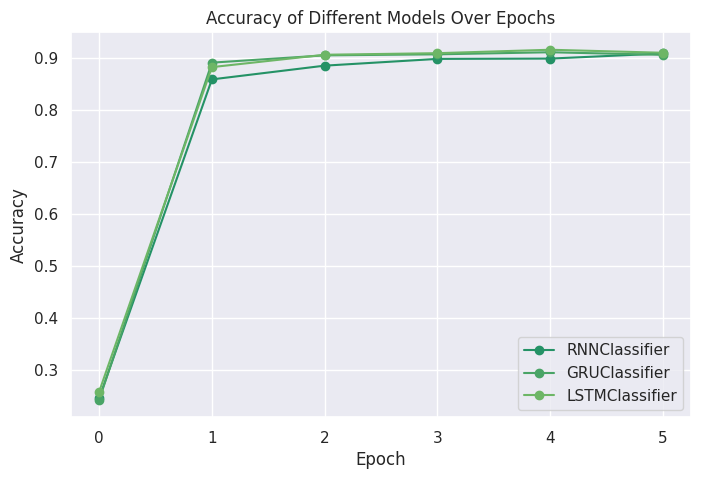

Best accuracy of RNNClassifier: 0.9092 at epoch 6
Best accuracy of GRUClassifier: 0.9116 at epoch 5
Best accuracy of LSTMClassifier: 0.9164 at epoch 5


In [50]:
epochs = range(len(model_acc['RNNClassifier']))
plt.figure(figsize=(8, 5))

for model_name, accuracies in model_acc.items():
    plt.plot(epochs, accuracies, marker='o', label=model_name)

plt.title('Accuracy of Different Models Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Нахождение и вывод максимальных значений для каждой модели
for model_name, accuracies in model_acc.items():
    max_acc = max(accuracies)
    epoch = accuracies.index(max_acc) + 1
    print(f"Best accuracy of {model_name}: {max_acc:.4f} at epoch {epoch}")